***   THIS IS FIRST ALGORHITE CLASSIFICATION ***

##CLASSIC ML

In [15]:

URL = 'https://raw.githubusercontent.com/vkrit/data-science-class/e4f8b2713bddecd556a57fedefc82e5cd7afa262/WA_Fn-UseC_-Sales-Win-Loss.csv'

# استفاده از پارامتر on_bad_lines='skip' برای نادیده گرفتن خطوط مشکل‌دار
df = pd.read_csv(URL, on_bad_lines='skip')



   Opportunity Number     Supplies Subgroup          Supplies Group  \
0             1641984  Exterior Accessories         Car Accessories   
1             1658010  Exterior Accessories         Car Accessories   
2             1674737      Motorcycle Parts  Performance & Non-auto   
3             1675224         Shelters & RV  Performance & Non-auto   
4             1689785  Exterior Accessories         Car Accessories   

      Region Route To Market  Elapsed Days In Sales Stage Opportunity Result  \
0  Northwest    Fields Sales                           76                Won   
1    Pacific        Reseller                           63               Loss   
2    Pacific        Reseller                           24                Won   
3    Midwest        Reseller                           16               Loss   
4    Pacific        Reseller                           69               Loss   

   Sales Stage Change Count  Total Days Identified Through Closing  \
0                     

In [16]:
df.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [21]:
df.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [25]:
ROMA=list(df['Route To Market'].unique())
ROMA

['Fields Sales', 'Reseller', 'Other', 'Telesales', 'Telecoverage']

In [26]:
##impor sklearn for pre processing and import model

In [35]:
from sklearn import preprocessing

# ایجاد LabelEncoder
le = preprocessing.LabelEncoder()

# تبدیل ستون های مختلف
df['Supplies Subgroup'] = le.fit_transform(df['Supplies Subgroup'])
df['Region'] = le.fit_transform(df['Region'])
df['Route To Market'] = le.fit_transform(df['Route To Market'])
df['Opportunity Result'] = le.fit_transform(df['Opportunity Result'])
df['Competitor Type'] = le.fit_transform(df['Competitor Type'])
df['Supplies Group'] = le.fit_transform(df['Supplies Group'])



##preprocessed


In [36]:
df.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,1,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,1,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,1,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,1,0.00000,0.141125,0.000000,4


In [ ]:
#MAKE TRAIN SET and TEST SET

In [48]:
cols = [col for col in df.columns if col not in ['Opportunity Number','Opportunity Result']]
data = df[cols]

target =df ['Opportunity Result']
data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,1,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,1,0.00000,1.000000,0.000000,1


In [51]:
from sklearn.model_selection import train_test_split

data_test,data_train,target_test,target_train = train_test_split(data,target,test_size=0.30,train_size=0.70, random_state=10)

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(data_train, target_train)
pred = gnb.predict(data_test)
print(f'accuracy : {accuracy_score(target_test, pred, normalize = True)}')

accuracy : 0.7539960085687606


In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svc_model = LinearSVC()
pred = gnb.fit(data_train, target_train).predict(data_test)

print(f'accuracy : {accuracy_score(target_test, pred, normalize = True)}')


accuracy : 0.6947104381419704


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_train,target_train)
pred = neigh.predict(data_test)

print(f'accuracy : {accuracy_score(target_test, pred)}')


accuracy : 0.8012157386894191


$$ MAKE PIPLINE$$

In [82]:
classifires = [
    GaussianNB(),
    KNeighborsClassifier(3),
    LinearSVC()
    
]
log_cols = ["Type Model", "Accuracy"]
log = pd.DataFrame(columns = log_cols)
log

,Type Model,Accuracy


In [86]:

log_entries = []

for clf in classifires:
    print('='*30)
    name = clf.__class__.__name__
    print(name)

    clf.fit(data_train, target_train)
    train_prediction = clf.predict(data_test)
    acc = accuracy_score(target_test, train_prediction)
    print("ACCURACY: {:.4%}".format(acc))

    log_entry = pd.DataFrame([[name, acc * 100]], columns=log_cols)
    log_entries.append(log_entry)

# ترکیب همه log_entries به DataFrame اصلی
log = pd.concat(log_entries, ignore_index=True)

print(log)
print('='*30)


GaussianNB
ACCURACY: 75.3996%
KNeighborsClassifier
ACCURACY: 80.1216%
LinearSVC
ACCURACY: 75.9599%
             Classifier   Accuracy
0            GaussianNB  75.399601
1  KNeighborsClassifier  80.121574
2             LinearSVC  75.959866


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [87]:
log

,Classifier,Accuracy
0,GaussianNB,75.399601
1,KNeighborsClassifier,80.121574
2,LinearSVC,75.959866


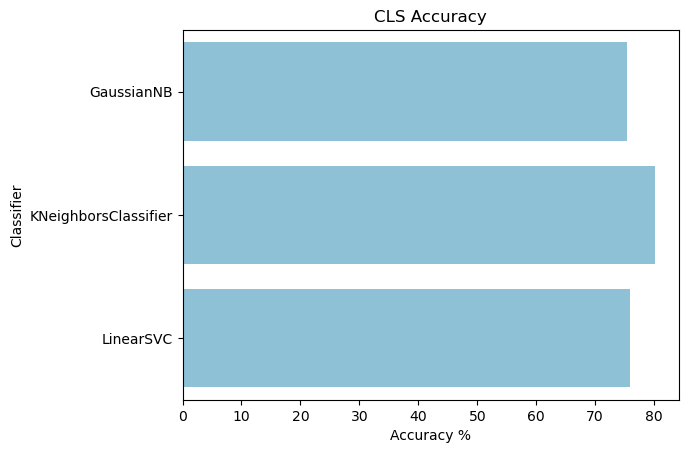

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_color_codes("muted")
sns.barplot(x='Accuracy',y ='Classifier', data=log,color='c')

plt.xlabel('Accuracy %')
plt.title('CLS Accuracy')
plt.show()

$$** REGRESSION**$$


In [104]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes_sklearn = load_diabetes()

# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data,
                           columns=diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target

print(diabetes_df.head())

# Print the shape of the feature matrix and target vector
print("Shape of Sklearn Diabetes Data:", diabetes_df.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Shape of Sklearn Diabetes Data: (442, 11)


In [106]:
df =diabetes_df
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [134]:
import numpy as np

# انتخاب ستون دوم از DataFrame و تبدیل آن به یک آرایه NumPy
x = df.iloc[:, 2].values

# تبدیل به آرایه دو بعدی
x = x[:, np.newaxis]

# برای اطمینان از شکل داده‌ها
print(x.shape)


(442, 1)


In [135]:
x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [139]:
y= df.iloc[:,-1].values
y = y[:, np.newaxis]


In [140]:
y

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [159]:
from sklearn.linear_model import LinearRegression

# ایجاد و آموزش مدل رگرسیون خطی
reg = LinearRegression()
reg.fit(x, y)

# انجام پیش‌بینی‌ها
pred = reg.predict(x)

# نمایش مقادیر پیش‌بینی شده
print(pred)


[[210.71003806]
 [103.26219543]
 [194.33703347]
 [141.12476855]
 [117.58857445]
 [113.4953233 ]
 [107.35544658]
 [150.33458363]
 [210.71003806]
 [189.22046954]
 [ 72.56281182]
 [168.7542138 ]
 [124.75176395]
 [150.33458363]
 [127.82170232]
 [134.98489182]
 [192.2904079 ]
 [163.63764986]
 [142.14808133]
 [134.98489182]
 [ 98.14563149]
 [130.89164068]
 [148.28795806]
 [209.68672528]
 [186.15053118]
 [140.10145576]
 [ 78.70268854]
 [208.66341249]
 [131.91495346]
 [146.24133248]
 [194.33703347]
 [ 89.9591292 ]
 [271.0854925 ]
 [104.28550821]
 [ 92.00575477]
 [122.70513838]
 [173.87077773]
 [162.61433707]
 [219.91985315]
 [165.68427544]
 [144.19470691]
 [ 87.91250362]
 [142.14808133]
 [129.86832789]
 [216.84991479]
 [118.61188723]
 [141.12476855]
 [ 82.79593969]
 [112.47201051]
 [165.68427544]
 [145.2180197 ]
 [167.73090101]
 [143.17139412]
 [137.0315174 ]
 [175.91740331]
 [105.308821  ]
 [191.26709511]
 [ 92.00575477]
 [ 90.98244198]
 [127.82170232]
 [148.28795806]
 [156.47446035]
 [145.21

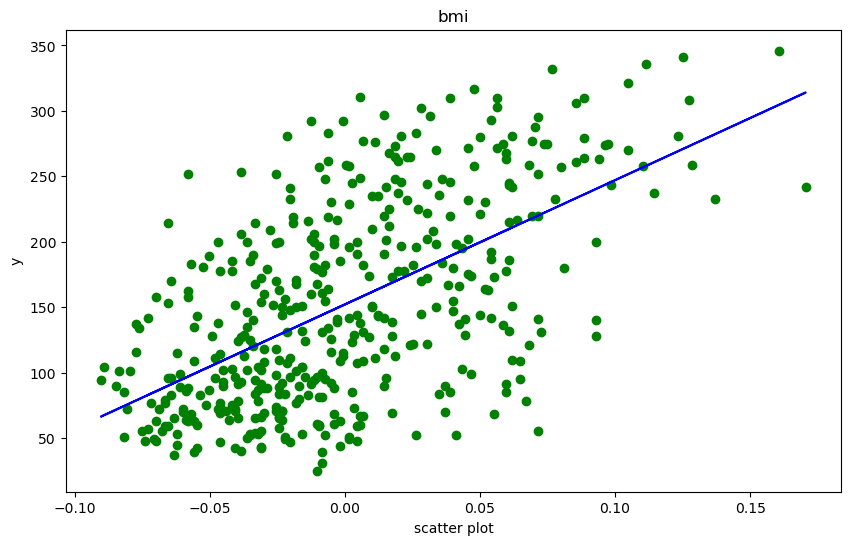

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green')
plt.plot(x, pred, color='blue')
plt.xlabel('scatter plot')
plt.ylabel('y')
plt.title('bmi')
plt.show()
